* Finding important nodes in the graphs
* Infectious diseases - infectious agents, who was in contact who, how to stop further spread


* dataset - Konect - face to face network - undirected graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from custom import load_data as cf
from custom import ecdf
import warnings
warnings.filterwarnings('ignore')
from nxviz import CircosPlot
import numpy as np


%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load the sociopatterns network data. 
G = cf.load_sociopatterns_network()

* Importance of nodes? 

    - Number of edges connected to the node
    - neighbors of node are nodes connected to that particular nodes
    - .neighbors()

In [3]:
G.nodes()

NodeView((100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 116, 120, 122, 133, 134, 10, 11, 113, 12, 13, 14, 15, 16, 107, 23, 26, 123, 128, 145, 147, 136, 124, 131, 140, 112, 114, 115, 125, 129, 130, 132, 167, 168, 171, 172, 177, 187, 188, 190, 169, 175, 32, 146, 48, 127, 183, 121, 138, 117, 118, 126, 148, 164, 178, 182, 214, 226, 233, 144, 141, 163, 166, 1, 2, 142, 17, 20, 156, 161, 160, 36, 149, 215, 143, 18, 135, 189, 222, 228, 230, 246, 35, 208, 49, 137, 139, 19, 165, 192, 218, 225, 235, 150, 151, 152, 153, 154, 155, 157, 158, 159, 162, 170, 173, 174, 179, 181, 219, 50, 51, 5, 204, 193, 224, 199, 6, 212, 176, 191, 194, 198, 202, 206, 244, 247, 33, 184, 207, 255, 180, 185, 223, 238, 203, 232, 251, 253, 254, 200, 211, 186, 243, 245, 259, 264, 265, 270, 271, 272, 283, 284, 286, 287, 298, 300, 308, 309, 242, 217, 213, 252, 201, 312, 38, 42, 195, 196, 197, 205, 210, 216, 229, 231, 236, 237, 241, 248, 257, 258, 260, 261, 262, 263, 266, 267, 277, 278, 291, 292, 299, 323, 209, 227, 2

In [4]:
len(G.nodes())

410

In [5]:
len(G.edges())

2765

In [6]:
list(G.neighbors(7))

[5, 6, 21, 22, 37, 48, 51]

### Which node has most number of neighbors?

In [7]:
important_neighbors = sorted(G.nodes(), key = lambda x: len(list(G.neighbors(x))), reverse = True)
important_neighbors[:5]

[51, 272, 235, 195, 161]

### degree centrality - number of neighbors / number of nodes that node could be connected to
* normalized value

In [8]:
nx.degree_centrality(G)

{100: 0.07090464547677261,
 101: 0.03178484107579462,
 102: 0.039119804400977995,
 103: 0.06356968215158924,
 104: 0.04156479217603912,
 105: 0.05623471882640587,
 106: 0.03667481662591687,
 108: 0.03667481662591687,
 109: 0.05134474327628362,
 110: 0.04645476772616137,
 111: 0.014669926650366748,
 116: 0.017114914425427872,
 120: 0.05378973105134474,
 122: 0.07823960880195599,
 133: 0.04645476772616137,
 134: 0.039119804400977995,
 10: 0.02444987775061125,
 11: 0.034229828850855744,
 113: 0.05623471882640587,
 12: 0.039119804400977995,
 13: 0.03178484107579462,
 14: 0.02689486552567237,
 15: 0.017114914425427872,
 16: 0.039119804400977995,
 107: 0.029339853300733496,
 23: 0.019559902200488997,
 26: 0.014669926650366748,
 123: 0.04645476772616137,
 128: 0.03667481662591687,
 145: 0.017114914425427872,
 147: 0.03178484107579462,
 136: 0.017114914425427872,
 124: 0.0488997555012225,
 131: 0.02444987775061125,
 140: 0.039119804400977995,
 112: 0.06356968215158924,
 114: 0.0122249388753056

In [9]:
ecdf?

Signature: ecdf(data)
Docstring: <no docstring>
File:      ~/Desktop/githubs/network-analysis/custom/__init__.py
Type:      function


* histogram - cannot find end values, if bin changed can lie about central tendency
* ecdf - cumulative fraction of that value and below - x axis - value, y axis - cumulative fraction below value
    - gives median (central tendency)
    - can tell extreme values

Text(0.5, 1.0, 'Degree centrality')

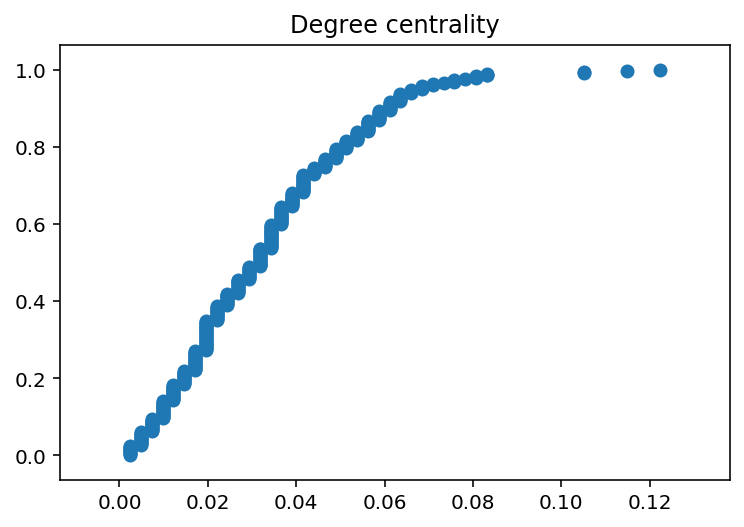

In [10]:
degree_centrality = list(nx.degree_centrality(G).values())
x,y = ecdf(degree_centrality)
plt.scatter(x,y)
plt.title('Degree centrality')

* normally distributed data will be sigmoidal
* degree centrality and neighbors will have same shape

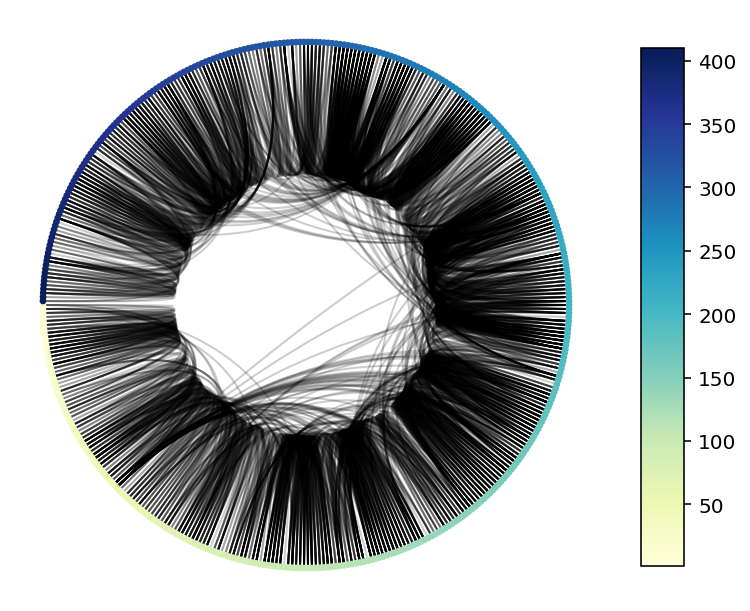

In [11]:
c = CircosPlot(G, node_order = 'order', node_color = 'order')
c.draw()

In [12]:
## BFS - find if path exists between two nodes

def path_find(node1, node2, G):
    visited = set()
    
    queue = [node1]
    
    for node in queue:
        neighbors = list(G.neighbors(node))
        
        if(node2 in neighbors):
            return(True)
        else:
            visited.add(node)
            queue.extend([n for n in neighbors if n not in visited])
    return(False)

In [13]:
print(path_find(18,20,G))

True


In [14]:
nx.has_path(G, 400,1)

True

In [15]:
nx.shortest_path(G, 400, 4)

[400, 335, 230, 132, 112, 111, 90, 4]

* https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

In [19]:
def extract_path(G, node1, node2):
    if nx.has_path(G, node1, node2):
        nodes = nx.shortest_path(G, node1, node2)
        new_G = G.subgraph(nodes)
        return(new_G)

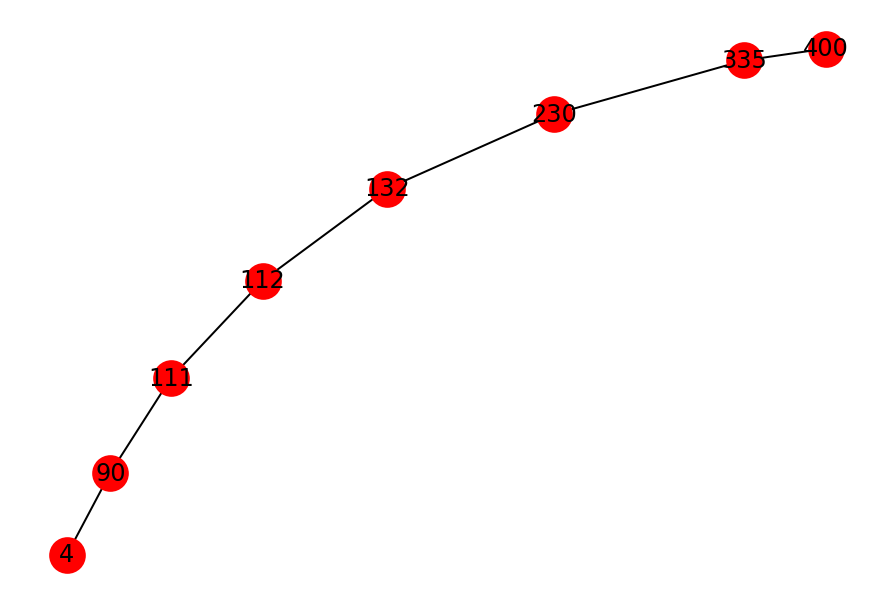

In [21]:
newG = extract_path(G, 4, 400)
nx.draw(newG, with_labels = True)

In [ ]:
# Possible Answer:

def extract_path_edges(G, source, target):
    # Check to make sure that a path does exists between source and target.
    if nx.has_path(G, source, target):
        nodes = nx.shortest_path(G, source, target)
        newG = G.subgraph(nodes)
        return newG

    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 4, 400)
nx.draw(newG, with_labels=True)